In [98]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

# Make numpy printouts nicer to read lol 
np.set_printoptions(precision=3, suppress=True)
print('hello first time')

hello first time


In [99]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Your custom column names
column_names = ['index', 'restaurant_id', 'list_position', 'total_available_restaurants', 'estimate_delivery_time', 'menu_category', 'star_rating', 'purchasers']

# Load the DataFrame, skipping the first row and directly assigning your custom column names
df = pd.read_csv('data_train.csv', header=0)

# Assign your custom column names
df.columns = column_names

# Display the first few rows of the DataFrame to verify
print('hello 2')

hello 2


In [100]:
df.shape

(25668, 8)

In [101]:
# top 5 rows 
df.head()

,index,restaurant_id,list_position,total_available_restaurants,estimate_delivery_time,menu_category,star_rating,purchasers
0,19499,68,19,26,35,indian,1,42
1,5515,899,9,29,20,italian,,49
2,5461,2964,2,11,20,american,4,40
3,2868,1993,10,14,25,indian,,45
4,26403,25,49,50,45,indian,,54


In [102]:
# bottom 5 rows
df.tail()

,index,restaurant_id,list_position,total_available_restaurants,estimate_delivery_time,menu_category,star_rating,purchasers
25663,21576,1014,1,29,15,american,4,48
25664,5391,1239,6,8,10,italian,5,40
25665,861,331,6,34,15,turkish,4,36
25666,15796,2956,12,14,20,pizza,,35
25667,23655,1741,4,15,10,italian,5,40


In [103]:
# check for missing values
df.isnull().sum()

index                          0
restaurant_id                  0
list_position                  0
total_available_restaurants    0
estimate_delivery_time         0
menu_category                  0
star_rating                    0
purchasers                     0
dtype: int64

In [104]:
# drop star_rating, too many missing values for it to be valuable 
df = df.drop(columns='index')
# no missing values now 
df.isnull().sum()

restaurant_id                  0
list_position                  0
total_available_restaurants    0
estimate_delivery_time         0
menu_category                  0
star_rating                    0
purchasers                     0
dtype: int64

In [105]:
df['restaurant_id'] = df['restaurant_id'].astype('category')
df.dtypes

restaurant_id                  category
list_position                     int64
total_available_restaurants       int64
estimate_delivery_time            int64
menu_category                    object
star_rating                      object
purchasers                        int64
dtype: object

In [106]:
df['star_rating'].unique()

array(['          1 ', '            ', '          4 ', '          3 ',
       '          5 ', '          2 '], dtype=object)

In [107]:
df['star_rating'] = df['star_rating'].str.strip()  # Remove leading and trailing whitespace
df['star_rating'] = df['star_rating'].replace('', np.nan)  # Replace empty strings with NaN
df['star_rating'] = df['star_rating'].astype(float)  # Convert to float
df['star_rating'] = df['star_rating'].astype('category')  # Convert to categorical

# Display the first few rows of the DataFrame to verify
print(df['star_rating'].unique())

[1.0, NaN, 4.0, 3.0, 5.0, 2.0]
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]


In [108]:
star_rating_category = df.pop('star_rating')
df['category_0'] = star_rating_category.isna().astype(int)
df['category_1'] = (star_rating_category == 1).astype(int)
df['category_2'] = (star_rating_category == 2).astype(int)
df['category_3'] = (star_rating_category == 3).astype(int)
df['category_4'] = (star_rating_category == 4).astype(int)
df['category_5'] = (star_rating_category == 5).astype(int)

# Display the first few rows of the DataFrame to verify
print(df.head())

  restaurant_id  list_position  total_available_restaurants  \
0            68             19                           26   
1           899              9                           29   
2          2964              2                           11   
3          1993             10                           14   
4            25             49                           50   

   estimate_delivery_time     menu_category  purchasers  category_0  \
0                      35  indian                    42           0   
1                      20  italian                   49           1   
2                      20  american                  40           0   
3                      25  indian                    45           1   
4                      45  indian                    54           1   

   category_1  category_2  category_3  category_4  category_5  
0           1           0           0           0           0  
1           0           0           0           0           0  
2 

In [109]:
# from sklearn.preprocessing import LabelEncoder
# 
# # Label encode the categorical variable
# label_encoder = LabelEncoder()
# df['restaurant_id'] = label_encoder.fit_transform(df['restaurant_id'])
from sklearn.preprocessing import OneHotEncoder

# Encode the categorical variable
encoder = OneHotEncoder(sparse_output=False)
menu_category_encoded = encoder.fit_transform(df[['menu_category']])
menu_category_encoded_df = pd.DataFrame(menu_category_encoded, columns=encoder.get_feature_names_out(['menu_category']))

# Drop the original categorical column and concatenate the encoded DataFrame
df = df.drop('menu_category', axis=1)
df = pd.concat([df, menu_category_encoded_df], axis=1)

df = df.drop('restaurant_id', axis=1)

df['list_position_by_total_restaurants'] = df['list_position'] / df['total_available_restaurants']



In [110]:
# split the data into train and test 
# we want 80% to train our model 
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [111]:
# check shape of data
print(df.shape, train_df.shape, test_df.shape)

(25668, 30) (20534, 30) (5134, 30)


In [112]:
# Descriptive statistics
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
list_position,20534.0,15.880880,15.568170,0.0,4.000000,11.0,22.000000,90.0
total_available_restaurants,20534.0,27.910149,18.158492,0.0,14.000000,24.0,38.000000,90.0
estimate_delivery_time,20534.0,20.824973,8.812304,10.0,15.000000,20.0,25.000000,50.0
purchasers,20534.0,55.729230,34.525798,30.0,40.000000,45.0,63.000000,822.0
category_0,20534.0,0.438882,0.496263,0.0,0.000000,0.0,1.000000,1.0
category_1,20534.0,0.016996,0.129260,0.0,0.000000,0.0,0.000000,1.0
category_2,20534.0,0.010227,0.100612,0.0,0.000000,0.0,0.000000,1.0
category_3,20534.0,0.051719,0.221465,0.0,0.000000,0.0,0.000000,1.0
category_4,20534.0,0.192900,0.394584,0.0,0.000000,0.0,0.000000,1.0
category_5,20534.0,0.289276,0.453437,0.0,0.000000,0.0,1.000000,1.0


In [113]:
# Descriptive statistics for test dataframe
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
list_position,5134.0,15.987145,15.578157,0.0,4.000000,11.0,22.000000,90.0
total_available_restaurants,5134.0,28.240164,18.452982,0.0,14.000000,24.0,39.000000,90.0
estimate_delivery_time,5134.0,20.944683,8.885030,5.0,15.000000,20.0,25.000000,50.0
purchasers,5134.0,55.855279,34.343061,30.0,40.000000,45.0,63.000000,848.0
category_0,5134.0,0.431632,0.495352,0.0,0.000000,0.0,1.000000,1.0
category_1,5134.0,0.017530,0.131249,0.0,0.000000,0.0,0.000000,1.0
category_2,5134.0,0.010323,0.101088,0.0,0.000000,0.0,0.000000,1.0
category_3,5134.0,0.051227,0.220482,0.0,0.000000,0.0,0.000000,1.0
category_4,5134.0,0.197507,0.398157,0.0,0.000000,0.0,0.000000,1.0
category_5,5134.0,0.291780,0.454626,0.0,0.000000,0.0,1.000000,1.0


In [114]:
# split features and labels
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('purchasers')
test_labels = test_features.pop('purchasers')

In [115]:
# top 5 rows of train features
train_features.head()

,list_position,total_available_restaurants,estimate_delivery_time,category_0,category_1,category_2,category_3,category_4,category_5,menu_category_Healthy options,...,menu_category_korean,menu_category_lebanese,menu_category_mexican,menu_category_pizza,menu_category_south indian,menu_category_thai,menu_category_turkish,menu_category_vegetarian,menu_category_vietnamese,list_position_by_total_restaurants
4603,73,76,35,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.960526
20609,28,49,20,0,0,0,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429
20615,2,13,10,0,0,0,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846
14087,20,23,15,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.869565
12714,8,10,35,0,0,0,0,0,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800000


In [116]:
# top 5 rows of test features
test_features.head()

,list_position,total_available_restaurants,estimate_delivery_time,category_0,category_1,category_2,category_3,category_4,category_5,menu_category_Healthy options,...,menu_category_korean,menu_category_lebanese,menu_category_mexican,menu_category_pizza,menu_category_south indian,menu_category_thai,menu_category_turkish,menu_category_vegetarian,menu_category_vietnamese,list_position_by_total_restaurants
10,3,36,10,0,0,0,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.083333
13,6,46,10,0,0,0,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130435
19,4,13,10,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307692
28,24,35,15,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.685714
40,2,4,10,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000


In [117]:
train_labels.head()

4603     49
20609    54
20615    30
14087    35
12714    56
Name: purchasers, dtype: int64

In [118]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='red', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('purchasers')
    plt.legend()
    

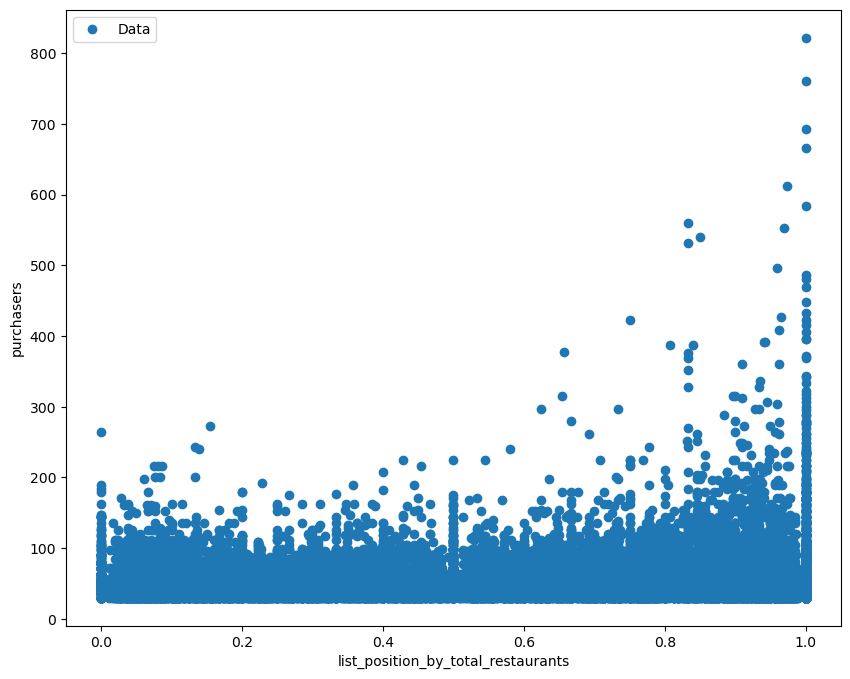

In [119]:
plot('list_position_by_total_restaurants')

In [120]:
print(train_df.describe().transpose()[['mean', 'std']])

                                         mean        std
list_position                       15.880880  15.568170
total_available_restaurants         27.910149  18.158492
estimate_delivery_time              20.824973   8.812304
purchasers                          55.729230  34.525798
category_0                           0.438882   0.496263
category_1                           0.016996   0.129260
category_2                           0.010227   0.100612
category_3                           0.051719   0.221465
category_4                           0.192900   0.394584
category_5                           0.289276   0.453437
menu_category_Healthy options        0.001071   0.032715
menu_category_american               0.286111   0.451953
menu_category_argentinian            0.000146   0.012087
menu_category_asian                  0.006818   0.082291
menu_category_european               0.003506   0.059112
menu_category_german                 0.001412   0.037555
menu_category_greek            

In [121]:
train_df.dtypes

list_position                           int64
total_available_restaurants             int64
estimate_delivery_time                  int64
purchasers                              int64
category_0                              int32
category_1                              int32
category_2                              int32
category_3                              int32
category_4                              int32
category_5                              int32
menu_category_Healthy options         float64
menu_category_american                float64
menu_category_argentinian             float64
menu_category_asian                   float64
menu_category_european                float64
menu_category_german                  float64
menu_category_greek                   float64
menu_category_indian                  float64
menu_category_italian                 float64
menu_category_japanese                float64
menu_category_korean                  float64
menu_category_lebanese            

In [122]:
# normalize data
normalizer = tf.keras.layers.Normalization()

# apply adapt
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[15.881 27.91  20.825  0.439  0.017  0.01   0.052  0.193  0.289  0.001
   0.286  0.     0.007  0.004  0.001  0.005  0.188  0.268  0.051  0.001
   0.014  0.046  0.038  0.001  0.047  0.037  0.001  0.004    nan]]


In [123]:
train_features[:1]

,list_position,total_available_restaurants,estimate_delivery_time,category_0,category_1,category_2,category_3,category_4,category_5,menu_category_Healthy options,...,menu_category_korean,menu_category_lebanese,menu_category_mexican,menu_category_pizza,menu_category_south indian,menu_category_thai,menu_category_turkish,menu_category_vegetarian,menu_category_vietnamese,list_position_by_total_restaurants
4603,73,76,35,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.960526


In [124]:
 # normalization of features
first = np.array(train_features[:1])
print('Normalize', normalizer(first).numpy())

Normalize [[ 3.669  2.648  1.609  1.131 -0.131 -0.102 -0.234 -0.489 -0.638 -0.033
  -0.633 -0.012 -0.083 -0.059 -0.038 -0.074 -0.481  1.651 -0.233 -0.026
  -0.119 -0.219 -0.2   -0.028 -0.222 -0.196 -0.03  -0.061    nan]]


In [125]:
# first deep learning regression model
feature = 'list_position_by_total_restaurants'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Reshape the input feature to be a 2D array
single_feature = single_feature.reshape(-1, 1)
print(single_feature.shape)  # Should output (20534, 1)

# normalization
single_feature_normalizer = tf.keras.layers.Normalization()

# adapt to the data
single_feature_normalizer.adapt(single_feature)

(20534,) (20534, 29)
(20534, 1)


In [126]:
# sequential model
single_feature_model = tf.keras.models.Sequential([single_feature_normalizer, layers.Dense(units=1)])

In [127]:
# summary of the model
single_feature_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ ?                      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (16.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3 (16.00 B)

In [128]:
# define loss and optimizer
loss = keras.losses.MeanSquaredError()
optim = tf.keras.optimizers.Adam(learning_rate=0.1)
single_feature_model.compile(loss=loss, optimizer=optim)
print(train_features[feature].shape)

(20534,)


In [129]:
# Fit the model
history = single_feature_model.fit(train_features[feature], train_labels, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 10/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan


In [130]:
single_feature_model.evaluate(test_features[feature], test_labels, verbose=1)

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan


nan

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


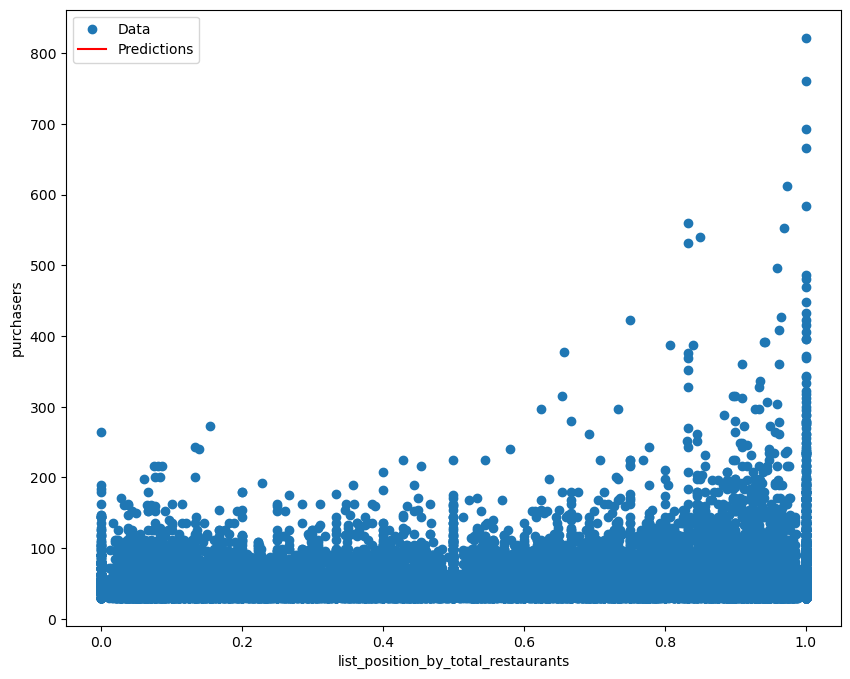

In [131]:
# make prediction
x = tf.linspace(0, 1, 100)
y = single_feature_model.predict(x)

# plot actual vs predicted
plot(feature, x, y)

In [132]:
# deep neural network
dnn_model = tf.keras.models.Sequential([single_feature_normalizer, layers.Dense(64, activation='relu'), layers.Dense(64, activation='relu'), layers.Dense(1)])


In [133]:
# compile model
dnn_model.compile(loss=loss, metrics=['mse', 'mae', 'mape', 'r2_score'], optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [134]:
dnn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (16.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3 (16.00 B)

In [135]:
# fit model
dnn_model.fit(train_features[feature], train_labels, validation_split=0.2, verbose=1, epochs=10)

Epoch 1/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4396.1968 - mae: 56.1152 - mape: 99.7301 - mse: 4396.1968 - r2_score: -2.5356 - val_loss: 3886.3669 - val_mae: 54.1088 - val_mape: 98.9135 - val_mse: 3886.3669 - val_r2_score: -3.0542
Epoch 2/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4426.9795 - mae: 55.4967 - mape: 98.6522 - mse: 4426.9795 - r2_score: -2.3313 - val_loss: 3831.5891 - val_mae: 53.6002 - val_mape: 97.8248 - val_mse: 3831.5891 - val_r2_score: -2.9970
Epoch 3/10
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4146.6167 - mae: 54.8489 - mape: 97.5763 - mse: 4146.6167 - r2_score: -2.6678 - val_loss: 3777.5957 - val_mae: 53.0942 - val_mape: 96.7415 - val_mse: 3777.5957 - val_r2_score: -2.9407
Epoch 4/10
264/514 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3986.2244 - mae: 54.0956 - mape: 96.6324 - mse: 3986.2244 - r2_score: -2.7925


KeyboardInterrupt



In [ ]:
# evaluate model
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

In [ ]:
x = tf.linspace(0, 1, 100)
y = dnn_model.predict(x)

plot(feature, x, y)

In [ ]:
# all independent variables
linear_model = tf.keras.models.Sequential([normalizer, layers.Dense(units=1)]) 

In [ ]:
linear_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mse', 'mae', 'mape', 'r2_score'])

In [ ]:
linear_model.fit(train_features, train_labels, epochs=10, verbose=1, validation_split=0.2)

In [ ]:
evaluation_results = linear_model.evaluate(test_features, test_labels, verbose=1)

In [ ]:
print(evaluation_results)

In [ ]:
print(linear_model.metrics_names)

In [ ]:
rmse = np.sqrt(1006.0762)


In [ ]:
print(rmse)